In [1]:
import numpy as np
import pandas as pd
import seaborn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../IBM_Dataset_DIIG_S23.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
#Format data for PCA
#Attrition:
#    No: 0
#    Yes: 1
#BusinessTravel:
#    Non-Travel: 0
#    Travel_Rarely: 1
#    Travel_Frequently: 2
#Department: Skip
#EducationField: Skip
#Gender:
#    Male: 0
#    Female: 1
#JobRole: Skip
#MaritalStatus: Skip
#Over18:
#    N: 0
#    Y: 1
#OverTime:
#    No: 0
#    Yes: 1
#

cleaned_df = df.copy()
cleaned_df["Attrition"] = cleaned_df["Attrition"].replace("No",0)
cleaned_df["Attrition"] = cleaned_df["Attrition"].replace("Yes",1)

cleaned_df["BusinessTravel"] = cleaned_df["BusinessTravel"].replace("Non-Travel",0)
cleaned_df["BusinessTravel"] = cleaned_df["BusinessTravel"].replace("Travel_Rarely",1)
cleaned_df["BusinessTravel"] = cleaned_df["BusinessTravel"].replace("Travel_Frequently",2)

cleaned_df["Gender"] = cleaned_df["Gender"].replace("Male",0)
cleaned_df["Gender"] = cleaned_df["Gender"].replace("Female",1)

cleaned_df["Over18"] = cleaned_df["Over18"].replace("N",0)
cleaned_df["Over18"] = cleaned_df["Over18"].replace("Y",1)

cleaned_df["OverTime"] = cleaned_df["OverTime"].replace("No",0)
cleaned_df["OverTime"] = cleaned_df["OverTime"].replace("Yes",1)

cleaned_df = cleaned_df.select_dtypes(['number'])


In [6]:
cleaned_df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,2,1,1,2,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,8,1,1,2,3,0,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,1,4,4,0,...,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,3,4,1,5,4,1,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,1,1,7,1,0,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,23,2,1,2061,3,0,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,1,613,6,1,1,2062,4,0,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,1,155,4,3,1,2064,2,0,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,2,1023,2,3,1,2065,4,0,...,4,80,0,17,3,2,9,6,0,8


In [7]:
#Normalize data for PCA

#Replace standard deviation
std_df = cleaned_df.std(skipna=False)
for i in range(len(std_df)):
    if std_df[i] == 0:
        std_df[i] = 1
std_df

Age                            9.135373
Attrition                      0.367863
BusinessTravel                 0.532170
DailyRate                    403.509100
DistanceFromHome               8.106864
Education                      1.024165
EmployeeCount                  1.000000
EmployeeNumber               602.024335
EnvironmentSatisfaction        1.093082
Gender                         0.490065
HourlyRate                    20.329428
JobInvolvement                 0.711561
JobLevel                       1.106940
JobSatisfaction                1.102846
MonthlyIncome               4707.956783
MonthlyRate                 7117.786044
NumCompaniesWorked             2.498009
Over18                         1.000000
OverTime                       0.450606
PercentSalaryHike              3.659938
PerformanceRating              0.360824
RelationshipSatisfaction       1.081209
StandardHours                  1.000000
StockOptionLevel               0.852077
TotalWorkingYears              7.780782


In [8]:
normalized_df=(cleaned_df-cleaned_df.mean())/std_df
normalized_df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446199,2.280130,-0.162344,0.742274,-1.010565,-0.891385,0.0,-1.700704,-0.660306,1.224328,...,-1.583639,0.0,-0.931697,-0.421499,-2.171243,-2.492972,-0.164557,-0.063274,-0.678915,0.245750
1,1.321915,-0.438273,1.716755,-1.297333,-0.147100,-1.867790,0.0,-1.699043,0.254538,-0.816219,...,1.191033,0.0,0.241906,-0.164455,0.155654,0.337981,0.488342,0.764737,-0.368590,0.806267
2,0.008340,2.280130,-0.162344,1.413882,-0.887213,-0.891385,0.0,-1.695721,1.169383,-0.816219,...,-0.658749,0.0,-0.931697,-0.550021,0.155654,0.337981,-1.143905,-1.167290,-0.678915,-1.155541
3,-0.429518,-0.438273,1.716755,1.460969,-0.763861,1.061426,0.0,-1.694060,1.169383,1.224328,...,0.266142,0.0,-0.931697,-0.421499,0.155654,0.337981,0.161892,0.764737,0.252060,-1.155541
4,-1.086306,-0.438273,-0.162344,-0.524116,-0.887213,-1.867790,0.0,-1.690738,-1.575150,-0.816219,...,1.191033,0.0,0.241906,-0.678543,0.155654,0.337981,-0.817456,-0.615282,-0.058265,-0.595025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101124,-0.438273,1.716755,0.202014,1.703184,-0.891385,0.0,1.721084,0.254538,-0.816219,...,0.266142,0.0,0.241906,0.735197,0.155654,0.337981,-0.327782,-0.615282,-0.678915,-0.314766
1466,0.227269,-0.438273,-0.162344,-0.469595,-0.393804,-1.867790,0.0,1.722745,1.169383,-0.816219,...,-1.583639,0.0,0.241906,-0.292977,1.706919,0.337981,-0.001332,0.764737,-0.368590,0.806267
1467,-1.086306,-0.438273,-0.162344,-1.604637,-0.640509,0.085020,0.0,1.726068,-0.660306,-0.816219,...,-0.658749,0.0,0.241906,-0.678543,-2.171243,0.337981,-0.164557,-0.615282,-0.678915,-0.314766
1468,1.321915,-0.438273,1.716755,0.546491,-0.887213,0.085020,0.0,1.727729,1.169383,-0.816219,...,1.191033,0.0,-0.931697,0.735197,0.155654,-1.077495,0.325117,0.488733,-0.678915,1.086525


In [9]:
normalized_df.describe()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1470.0,1.470000e+03,1.470000e+03,1.470000e+03,...,1.470000e+03,1470.0,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,-3.746059e-17,1.256742e-16,-1.377583e-16,4.350262e-17,7.250436e-17,4.833624e-18,0.0,-1.546760e-16,1.963660e-16,-3.383537e-17,...,9.183886e-17,0.0,5.800349e-17,-2.175131e-17,5.316986e-17,-2.779334e-17,-2.658493e-17,1.063397e-16,3.866899e-17,-1.510508e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.071487e+00,-4.382732e-01,-2.041443e+00,-1.735985e+00,-1.010565e+00,-1.867790e+00,0.0,-1.700704e+00,-1.575150e+00,-8.162188e-01,...,-1.583639e+00,0.0,-9.316973e-01,-1.449673e+00,-2.171243e+00,-2.492972e+00,-1.143905e+00,-1.167290e+00,-6.789146e-01,-1.155541e+00
25%,-7.579120e-01,-4.382732e-01,-1.623439e-01,-8.363770e-01,-8.872132e-01,-8.913849e-01,0.0,-8.863683e-01,-6.603060e-01,-8.162188e-01,...,-6.587487e-01,0.0,-9.316973e-01,-6.785426e-01,-6.199782e-01,-1.077495e+00,-6.542311e-01,-6.152822e-01,-6.789146e-01,-5.950247e-01
50%,-1.011244e-01,-4.382732e-01,-1.623439e-01,-1.203726e-03,-2.704519e-01,8.502032e-02,0.0,-7.251046e-03,2.545383e-01,-8.162188e-01,...,2.661420e-01,0.0,2.419060e-01,-1.644554e-01,1.556541e-01,3.379811e-01,-3.277818e-01,-3.392783e-01,-3.685899e-01,-3.147664e-01
75%,6.651278e-01,-4.382732e-01,-1.623439e-01,8.785782e-01,5.930139e-01,1.061426e+00,0.0,8.818326e-01,1.169383e+00,1.224328e+00,...,1.191033e+00,0.0,2.419060e-01,4.781535e-01,1.556541e-01,3.379811e-01,3.251169e-01,7.647374e-01,2.520597e-01,8.062671e-01
max,2.526026e+00,2.280130e+00,1.716755e+00,1.726143e+00,2.443298e+00,2.037831e+00,0.0,1.732712e+00,1.169383e+00,1.224328e+00,...,1.191033e+00,0.0,2.589113e+00,3.691198e+00,2.482551e+00,1.753458e+00,5.385081e+00,3.800780e+00,3.975957e+00,3.608851e+00


In [10]:
#Compute PCA
cov_df = normalized_df.cov()
evals, evecs = np.linalg.eig(cov_df)
evecs = evecs.transpose()

In [11]:
evals

array([4.70468227, 1.83800022, 1.75832619, 0.04835437, 0.14110612,
       0.20306507, 0.22501064, 0.27964608, 1.40466097, 0.48389271,
       0.52026959, 0.60125958, 1.20987359, 1.15640615, 0.77115933,
       1.11193556, 1.0803156 , 1.0612354 , 1.02136093, 1.01009552,
       0.99757526, 0.97059902, 0.95232173, 0.86193982, 0.91734682,
       0.89877831, 0.88426886, 0.88651428, 0.        , 0.        ,
       0.        ])

In [12]:
#Sort eigenvectors by eigenvalues in decreasing order
sort_evecs = []
for i in range(len(evals)):
    sort_evecs.append(np.append(evals[i],evecs[i]))
sort_evecs = sorted(sort_evecs,key=lambda x : -x[0])
sort_evals = [sort_evecs[i][0] for i in range(len(sort_evecs))]
sort_evecs = [sort_evecs[i][1:] for i in range(len(sort_evecs))]

sort_evals = np.array(sort_evals)
sort_evecs = np.array(sort_evecs)
sort_evecs

array([[-2.76453528e-01,  1.11132545e-01,  6.28325881e-03,
         2.25232171e-03, -1.62548885e-03, -7.74515680e-02,
         0.00000000e+00,  7.93067959e-03, -5.53151968e-03,
        -2.81567383e-02,  9.85520957e-03, -2.73005681e-03,
        -3.80640705e-01,  6.04842934e-03, -3.72400464e-01,
        -5.17228573e-03, -4.68156702e-02,  0.00000000e+00,
         1.17604283e-02,  1.50952398e-02,  6.48225832e-06,
        -1.63540373e-02,  0.00000000e+00, -1.96369745e-02,
        -4.00912578e-01,  8.97792389e-03, -1.44397101e-02,
        -3.88126575e-01, -3.34375666e-01, -2.92937678e-01,
        -3.28725791e-01],
       [-2.88069530e-01, -1.28502658e-03,  9.78234186e-03,
        -3.72146814e-02,  5.38235500e-02, -1.47409296e-01,
         0.00000000e+00, -1.03518798e-02, -3.19222574e-02,
        -1.57789640e-02, -4.47822899e-02, -4.65576434e-02,
        -1.93338464e-01,  3.53716702e-02, -2.02719920e-01,
        -6.53507460e-02, -3.83466691e-01,  0.00000000e+00,
        -4.36145486e-02,  4.13

<AxesSubplot:title={'center':'Importance Scores of Component Axes from PCA'}, xlabel='Component (Eigenvector)', ylabel='Importance Score (Eigenvalue)'>

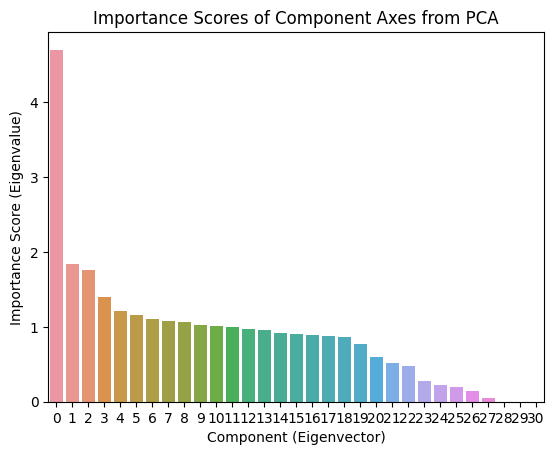

In [13]:
#Plot importance of e-vecs
plt.title("Importance Scores of Component Axes from PCA")
graph_evals = pd.DataFrame([[i,sort_evals[i]] for i in range(len(sort_evals))],columns=["Component (Eigenvector)","Importance Score (Eigenvalue)"])
seaborn.barplot(data=graph_evals,x="Component (Eigenvector)",y="Importance Score (Eigenvalue)")

In [14]:
sort_evals

array([4.70468227, 1.83800022, 1.75832619, 1.40466097, 1.20987359,
       1.15640615, 1.11193556, 1.0803156 , 1.0612354 , 1.02136093,
       1.01009552, 0.99757526, 0.97059902, 0.95232173, 0.91734682,
       0.89877831, 0.88651428, 0.88426886, 0.86193982, 0.77115933,
       0.60125958, 0.52026959, 0.48389271, 0.27964608, 0.22501064,
       0.20306507, 0.14110612, 0.04835437, 0.        , 0.        ,
       0.        ])

<AxesSubplot:title={'center':'Employees on Axes of Components 0 and 1'}, xlabel='Component 0 Axis', ylabel='Component 1 Axis'>

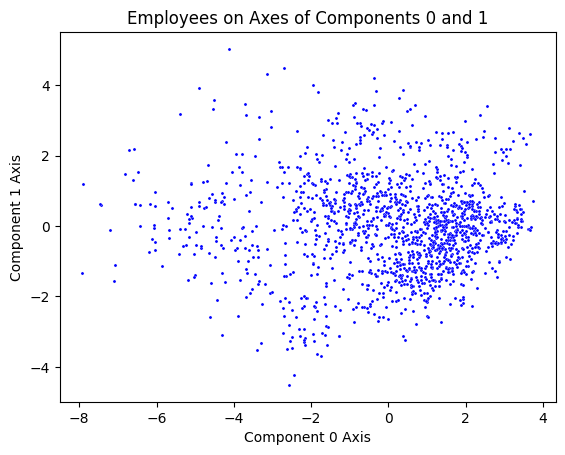

In [15]:
#Project data points onto eigenvectors
pc_array = np.array([np.dot(normalized_df, sort_evecs[i]) for i in range(len(sort_evecs))])

#Transpose so columns correspond to eigenvector directions
pc_array = pc_array.transpose()

#Graph main eigenvectors 0 and 1
plt.title("Employees on Axes of Components 0 and 1")
plt.xlabel("Component 0 Axis")
plt.ylabel('Component 1 Axis')
graph_df = pd.DataFrame(data=pc_array)
seaborn.scatterplot(data=graph_df,x=0,y=1,s=5,color='b')
# seaborn.scatterplot(data=cleaned_df,x='Age',y='DailyRate')

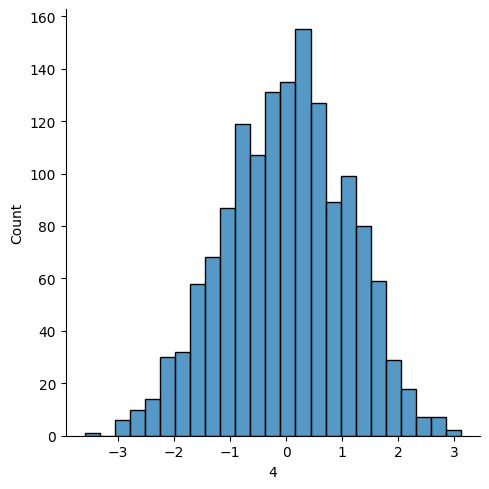

In [16]:
seaborn.displot(data=graph_df,x=4)

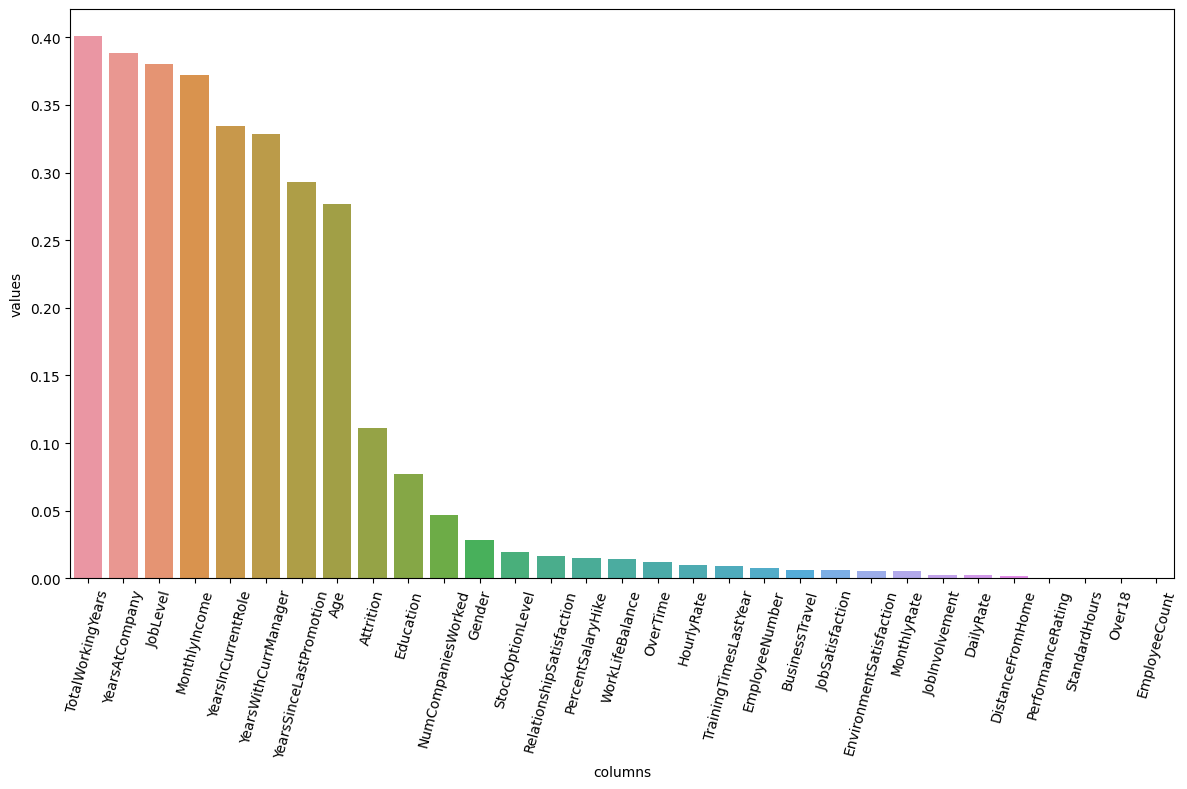

In [17]:
#Weights on variables in component 0
N=0
component_df = pd.DataFrame(np.array([normalized_df.columns, np.abs(sort_evecs[N])]).transpose(),columns=["columns","values"])
sort_component_df = component_df.sort_values(by="values",ascending=False)[:]

#Plot
plt.figure(figsize=(12,8))
plot = seaborn.barplot(data=sort_component_df,x="columns",y="values")
plot.set_xticklabels(sort_component_df["columns"], rotation=75)
plt.tight_layout()
plt.show()

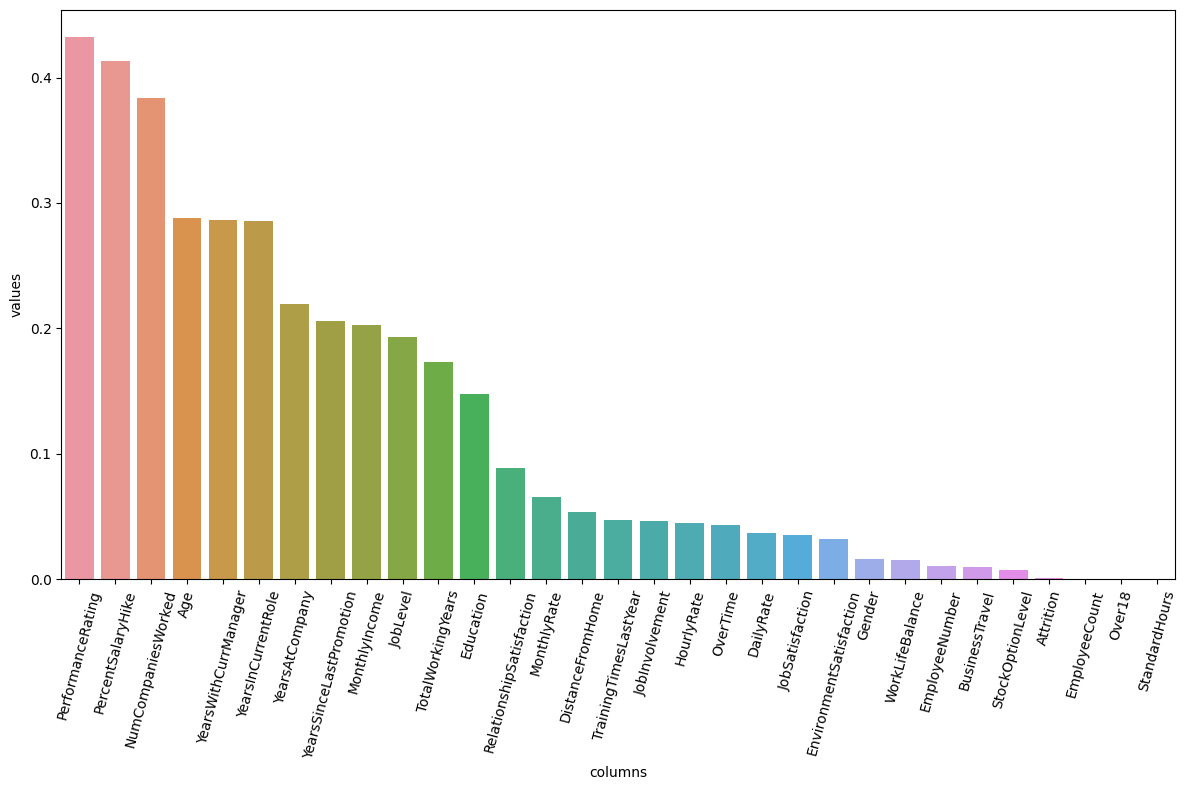

In [18]:
#Weights on variables in component 1
N=1
component_df = pd.DataFrame(np.array([normalized_df.columns, np.abs(sort_evecs[N])]).transpose(),columns=["columns","values"])
sort_component_df = component_df.sort_values(by="values",ascending=False)[:]

#Plot
plt.figure(figsize=(12,8))
plot = seaborn.barplot(data=sort_component_df,x="columns",y="values")
plot.set_xticklabels(sort_component_df["columns"], rotation=75)
plt.tight_layout()
plt.show()

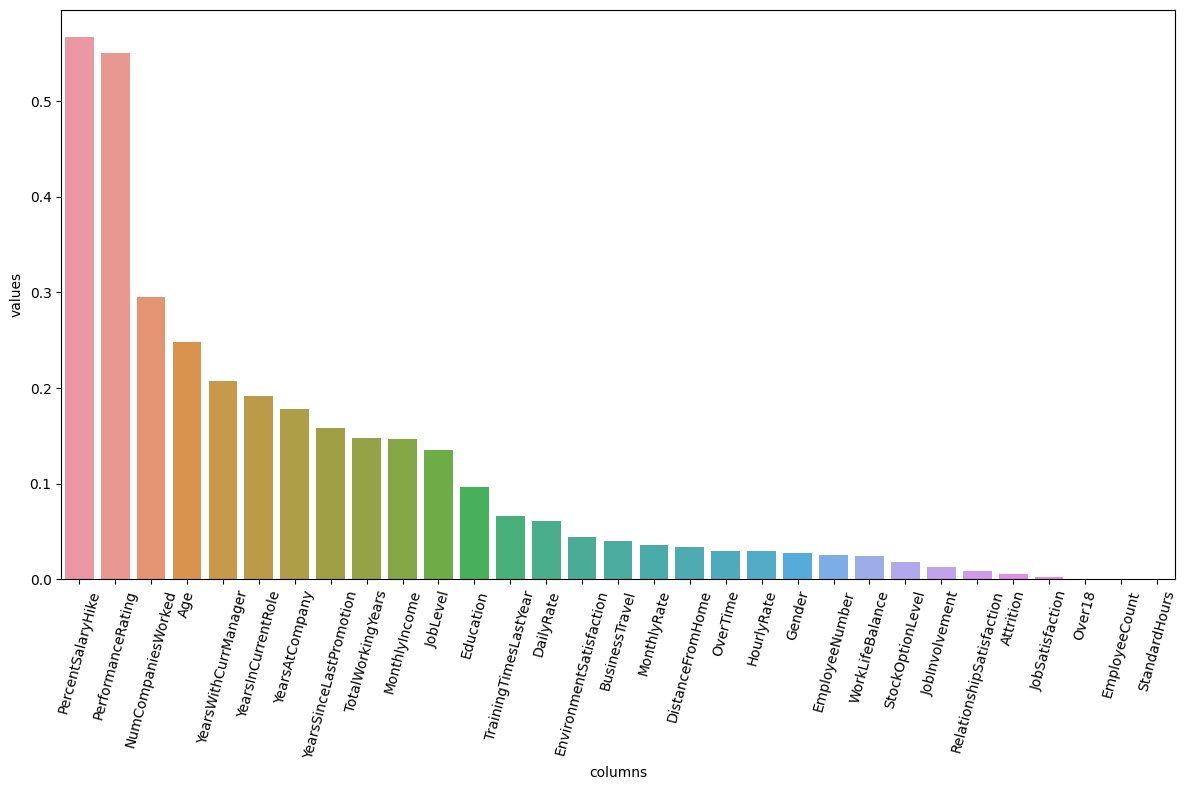

In [19]:
#Weights on variables in component 2
N=2
component_df = pd.DataFrame(np.array([normalized_df.columns, np.abs(sort_evecs[N])]).transpose(),columns=["columns","values"])
sort_component_df = component_df.sort_values(by="values",ascending=False)[:]

#Plot
plt.figure(figsize=(12,8))
plot = seaborn.barplot(data=sort_component_df,x="columns",y="values")
plot.set_xticklabels(sort_component_df["columns"], rotation=75)
plt.tight_layout()
plt.show()

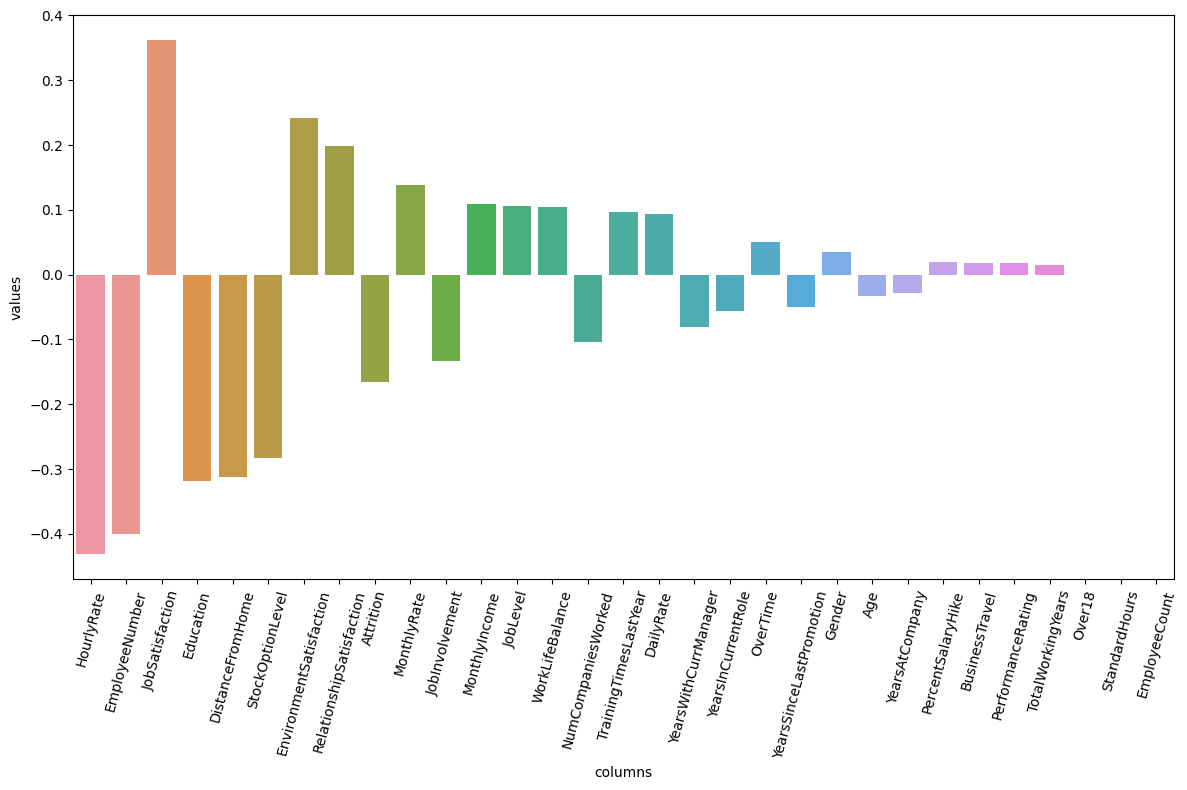

In [20]:
#Weights on variables in component 4
#Highlights JobSatisfaction
N=4
component_df = pd.DataFrame(np.array([normalized_df.columns, sort_evecs[N], np.abs(sort_evecs[N])]).transpose(),columns=["columns","values","abs"])
sort_component_df = component_df.sort_values(by="abs",ascending=False)[:]

#Plot
plt.figure(figsize=(12,8))
plot = seaborn.barplot(data=sort_component_df,x="columns",y="values")
plot.set_xticklabels(sort_component_df["columns"], rotation=75)
plt.tight_layout()
plt.show()

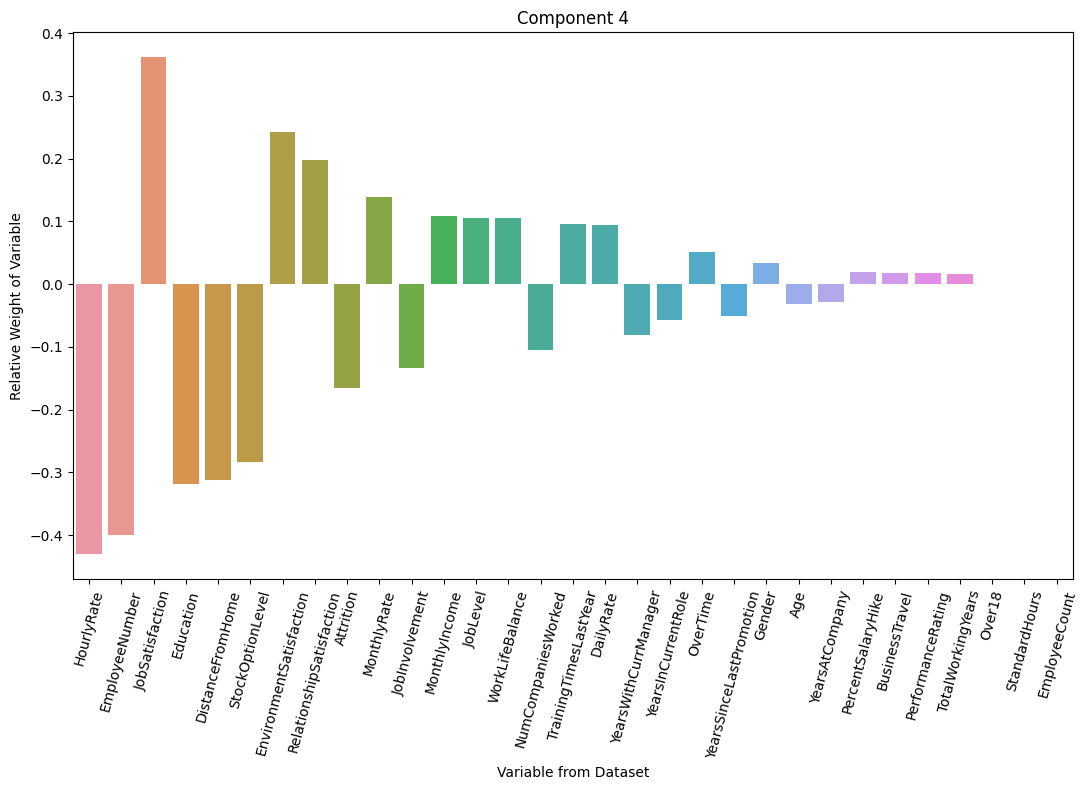

In [21]:
#Weights on variables in component 4
#Highlights JobSatisfaction
N=4
component_df = pd.DataFrame(np.array([normalized_df.columns, sort_evecs[N], np.abs(sort_evecs[N])]).transpose(),columns=["columns","values","abs"])
sort_component_df = component_df.sort_values(by="abs",ascending=False)[:]

#Plot
plt.figure(figsize=(11,8))
# plt.title("Component 0")
plot = seaborn.barplot(data=sort_component_df,x="columns",y="values")
plot.set_xticklabels(sort_component_df["columns"], rotation=75)
plot.set_xlabel("Variable from Dataset")
plot.set_ylabel("Relative Weight of Variable")
plot.set_title(f'Component {N}')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='0', ylabel='1'>

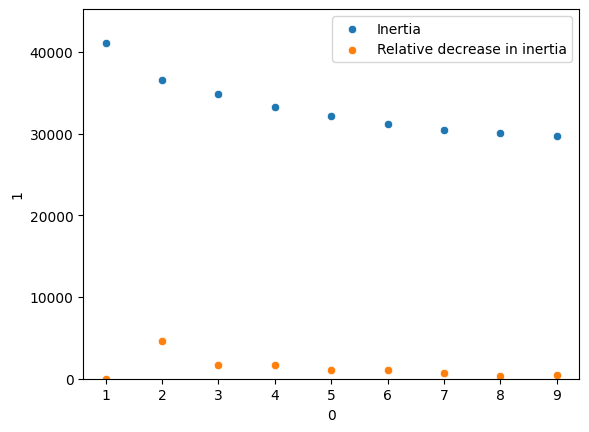

In [22]:
#Determine optimal number of clusters for KMeans
MAX_CLUSTERS = 10
inertia = []
d_inertia = []
for i in range(1,MAX_CLUSTERS):
    kmeans = KMeans(init="k-means++", n_clusters=i, n_init=5)
    kmeans.fit(graph_df)
    inertia.append([i,kmeans.inertia_])
    if (i > 1):
        d_inertia.append([i, inertia[i-2][1] - inertia[i-1][1]])
    else:
        d_inertia.append([1, 0])
    
inertia = pd.DataFrame(inertia)
d_inertia = pd.DataFrame(d_inertia)
p = seaborn.scatterplot(data=inertia,x=0,y=1,label='Inertia')
seaborn.scatterplot(data=d_inertia,x=0,y=1,label='Relative decrease in inertia')
plt.legend()
p.set_ylim(0,np.max(inertia[1])*1.1)
p

In [23]:
inertia[1][1]

36550.50783861966

In [24]:
#Finalized KMeans
kmeans = KMeans(init="k-means++", n_clusters=4, n_init=20)
kmeans.fit(graph_df)
employee_labels = kmeans.labels_
kmeans.labels_

array([2, 3, 2, ..., 3, 0, 2], dtype=int32)

[Text(0.5, 1.0, 'Employee Distribution Over Component Axes 1 and 2'),
 Text(0.5, 0, 'Component 1'),
 Text(0, 0.5, 'Component 2')]

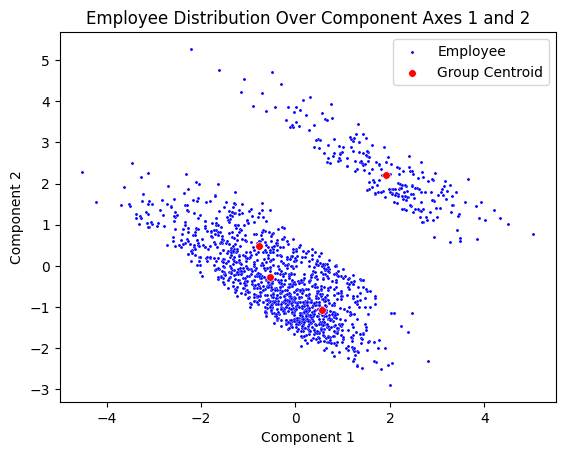

In [25]:
#Plot KMeans for data points
axes = [1,2]
seaborn.scatterplot(data=graph_df,x=axes[0],y=axes[1],s=5, color='b', label='Employee')

projected_centers = pd.DataFrame(np.array([kmeans.cluster_centers_.transpose()[axes[0]],
                                           kmeans.cluster_centers_.transpose()[axes[1]] ]).transpose())
seaborn.scatterplot(data=projected_centers,x=0, y=1, s=30, color='r',label='Group Centroid').set(
title='Employee Distribution Over Component Axes 1 and 2',
xlabel='Component 1',
ylabel='Component 2'
)

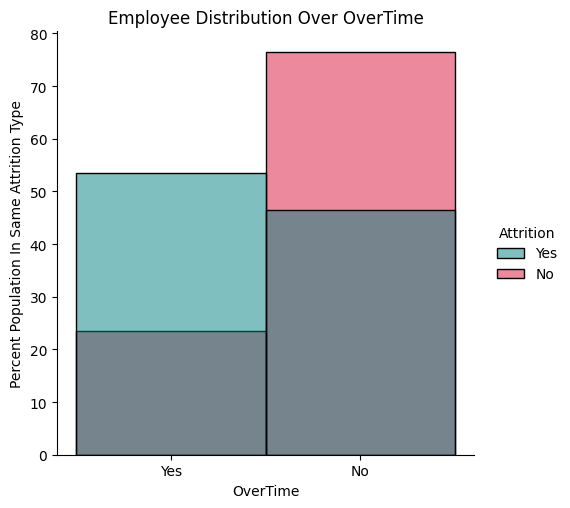

In [26]:
#Plot employee groups on key variables
x = 'OverTime'
seaborn.displot(data=df, x=x, hue='Attrition', stat='percent', palette=["teal", "crimson"],fill=True,common_norm=False).set(
title="Employee Distribution Over "+x,
    ylabel="Percent Population In Same Attrition Type"
)



<AxesSubplot:title={'center':'Inertia Against Number of Groups'}, xlabel='Number of Groups', ylabel='Inertia'>

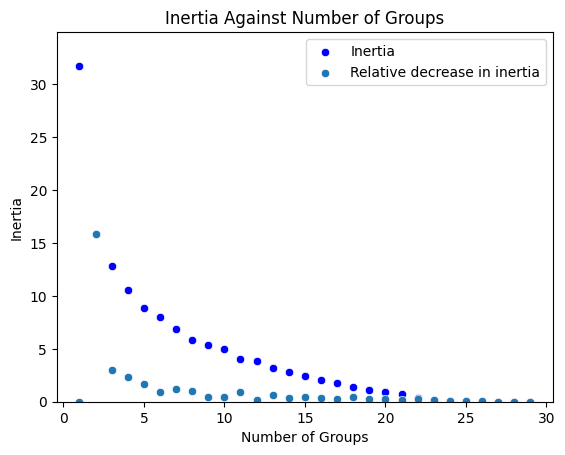

In [27]:
#KMeans for variables
#Determine optimal number of clusters for KMeans
MAX_CLUSTERS = 30
FIRST_N_AXES = 10
inertia = []
d_inertia = []

#Columns should be variables, rows should be axes, cut rows at FIRST_N_AXES
#Scale each axis by its eigenvalue/importance
fit_sort_evecs = np.array([sort_evecs[i]*sort_evals[i] for i in range(FIRST_N_AXES)]).transpose()
for i in range(1,MAX_CLUSTERS):
    kmeans = KMeans(init="k-means++", n_clusters=i, n_init=20)
    kmeans.fit(fit_sort_evecs)
    inertia.append([i,kmeans.inertia_])
    if (i > 1):
        d_inertia.append([i, inertia[i-2][1] - inertia[i-1][1]])
    else:
        d_inertia.append([1, 0])

inertia = pd.DataFrame(inertia)
d_inertia = pd.DataFrame(d_inertia)
p = seaborn.scatterplot(data=inertia,x=0,y=1,label='Inertia', color='b')
seaborn.scatterplot(data=d_inertia,x=0,y=1,label='Relative decrease in inertia')
p.set_ylim(0,np.max(inertia[1])*1.1)
p.set_title("Inertia Against Number of Groups")
p.set_xlabel("Number of Groups")
p.set_ylabel("Inertia")
p

In [28]:
#Finalized KMeans
N_CLUSTERS = 5
kmeans = KMeans(init="k-means++", n_clusters=N_CLUSTERS, n_init=20)
kmeans.fit(fit_sort_evecs)
# kmeans.cluster_centers_

KMeans(n_clusters=5, n_init=20)

In [29]:
#Find Variable Groups
variable_labels = pd.DataFrame(np.array([normalized_df.columns,kmeans.labels_]).transpose(),columns=['variable','group'])

variable_groups = []
for i in range(N_CLUSTERS):
    curr_group = []
    for j in range(len(variable_labels)):
        if (variable_labels['group'][j]==i):
            curr_group.append(variable_labels['variable'][j])
    variable_groups.append(curr_group)
variable_groups
            

[['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears'],
 ['BusinessTravel',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'Gender',
  'HourlyRate',
  'JobInvolvement',
  'JobSatisfaction',
  'MonthlyRate',
  'NumCompaniesWorked',
  'Over18',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TrainingTimesLastYear',
  'WorkLifeBalance'],
 ['YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'],
 ['PercentSalaryHike', 'PerformanceRating'],
 ['Attrition', 'OverTime']]

In [30]:
len(variable_labels)

31

[Text(0.5, 1.0, 'Variable Grouping, Displaying Components 0 and 3'),
 Text(0.5, 0, 'Component 0'),
 Text(0, 0.5, 'Component 3')]

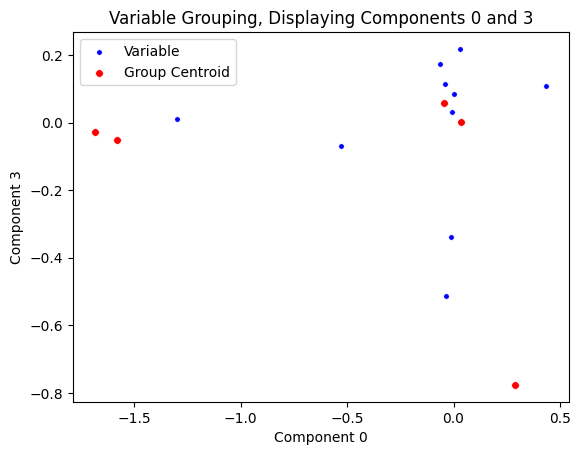

In [31]:
#Plot KMeans for variables
axes = [0,3] #Only consecutive integers!
graph_sort_evecs = pd.DataFrame(np.array([fit_sort_evecs[axes[0]],fit_sort_evecs[axes[1]]]).transpose())
seaborn.scatterplot(data=graph_sort_evecs,x=0,y=1,s=15, color='b', label="Variable")

variable_projected_centers = pd.DataFrame(np.array([kmeans.cluster_centers_.transpose()[axes[0]],
                                           kmeans.cluster_centers_.transpose()[axes[1]] ]).transpose())
seaborn.scatterplot(data=variable_projected_centers,x=0, y=1, s=30, color='r', label="Group Centroid").set(
title="Variable Grouping, Displaying Components 0 and 3",
xlabel="Component 0",
ylabel="Component 3"
)

In [32]:
graph_sort_evecs

,0,1
0,-1.300626,0.010596
1,-0.529472,-0.068401
2,0.436294,0.107560
3,0.028618,0.218598
4,-0.039116,0.113283
5,-0.033099,-0.513821
6,-0.008349,0.032076
7,0.000180,0.085927
8,-0.011548,-0.337954
9,-0.061595,0.173547


In [33]:
#Verify with sklearn PCA
principal=PCA(n_components=3)
principal.fit(normalized_df)
x=principal.transform(normalized_df)

In [34]:
principal.components_[2]

array([ 2.47441865e-01, -7.69775951e-03, -4.49032797e-02,  6.13431838e-02,
        3.29835942e-02,  9.41274526e-02,  1.87193164e-19, -1.96407478e-02,
       -3.67117547e-02,  2.44971529e-02,  3.38609483e-02, -1.10679222e-02,
        1.35464438e-01, -3.41930824e-03,  1.47428988e-01,  4.31791148e-02,
        2.95014595e-01, -0.00000000e+00,  2.98524210e-02,  5.66698672e-01,
        5.50577550e-01, -1.06742924e-02, -0.00000000e+00,  1.73357158e-02,
        1.47349810e-01, -7.45088985e-02, -2.13837779e-02, -1.78268016e-01,
       -1.91581276e-01, -1.58953816e-01, -2.08156398e-01])

In [35]:
sort_evecs[2]

array([ 0.2481305 , -0.0058692 , -0.04044326,  0.0611717 ,  0.03385638,
        0.09612392,  0.        , -0.02523872, -0.04373381,  0.02794037,
        0.02910011, -0.0123371 ,  0.13478658,  0.00257084,  0.14662942,
        0.03544507,  0.29562036,  0.        ,  0.02963154,  0.56716503,
        0.55104357, -0.00906635,  0.        ,  0.01852881,  0.14732311,
       -0.06663944, -0.02393212, -0.17786563, -0.19158373, -0.15842709,
       -0.20783595])

In [36]:
evecs[1]

array([-0.28806953, -0.00128503,  0.00978234, -0.03721468,  0.05382355,
       -0.1474093 ,  0.        , -0.01035188, -0.03192226, -0.01577896,
       -0.04478229, -0.04655764, -0.19333846,  0.03537167, -0.20271992,
       -0.06535075, -0.38346669,  0.        , -0.04361455,  0.41350921,
        0.43221371, -0.08878405,  0.        ,  0.00731171, -0.17304539,
        0.04760906,  0.01560636,  0.21980235,  0.28544954,  0.20604502,
        0.28631178])

In [37]:
principal.explained_variance_ratio_/0.16802437*4.704682

array([4.70468191, 1.83789775, 1.75794396])

In [38]:
sort_evals

array([4.70468227, 1.83800022, 1.75832619, 1.40466097, 1.20987359,
       1.15640615, 1.11193556, 1.0803156 , 1.0612354 , 1.02136093,
       1.01009552, 0.99757526, 0.97059902, 0.95232173, 0.91734682,
       0.89877831, 0.88651428, 0.88426886, 0.86193982, 0.77115933,
       0.60125958, 0.52026959, 0.48389271, 0.27964608, 0.22501064,
       0.20306507, 0.14110612, 0.04835437, 0.        , 0.        ,
       0.        ])